In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [1]:
%matplotlib inline

In [4]:
!dir


 Volume in drive C is TI10677500F
 Volume Serial Number is C60D-D3C8

 Directory of C:\Users\gvfortunato\Downloads\Machine_Learning_Lab\MLLab\Greg

02/25/2019  03:09 PM    <DIR>          .
02/25/2019  03:09 PM    <DIR>          ..
02/25/2019  03:05 PM    <DIR>          .ipynb_checkpoints
02/25/2019  03:09 PM               826 MachineLearningLab.ipynb
02/25/2019  02:40 PM    <DIR>          Machine_Learning_Lab
               1 File(s)            826 bytes
               4 Dir(s)  226,341,494,784 bytes free


In [3]:
orders = pd.read_csv('./Machine_Learning_Lab/data/Orders.csv')

In [4]:
returns = pd.read_csv('./Machine_Learning_Lab/data/Returns.csv')

In [5]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [5]:
numSales = list(map(lambda x: float(x.replace('$','').replace(',','')), orders.Sales))

In [6]:
orders.Sales = numSales

In [7]:
numProfit = list(map(lambda x: float(x.replace('$','').replace(',','')), orders.Profit))


In [8]:
orders.Profit = numProfit

In [9]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [10]:
from datetime import datetime

In [40]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [12]:
orders.groupby(by = pd.DatetimeIndex(orders['Order.Date']).month)

In [13]:
month = (pd.DatetimeIndex(orders['Order.Date']).month)

In [14]:
orders['month'] = month

In [15]:
year = (pd.DatetimeIndex(orders['Order.Date']).year)

In [16]:
orders['year'] = year

In [17]:
monthDummies = pd.get_dummies(orders.month)

In [18]:
monthDummies.head()


,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [18]:
monthDummies.drop([1], axis = 1, inplace = True)

In [84]:
orders['Order.Date'].describe()

count                   51290
unique                   1430
top       2015-06-18 00:00:00
freq                      135
first     2012-01-01 00:00:00
last      2015-12-31 00:00:00
Name: Order.Date, dtype: object

In [19]:
orders = pd.concat([orders, monthDummies], axis = 1)

In [21]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,3,4,5,6,7,8,9,10,11,12
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0,0,0,0,0,0,0,0,1,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0,0,0,0,0,0,0,0,0,0
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0,0,0,0,0,0,0,1,0,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0,0,0,0,0,0,0,0,0,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0,0,0,0,0,0,0,0,1,0


Problem 2

(array([ 4820.,  3007.,  3032.,  3787.,  5302.,  3195.,  5065.,  5958.,
         4556., 12568.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

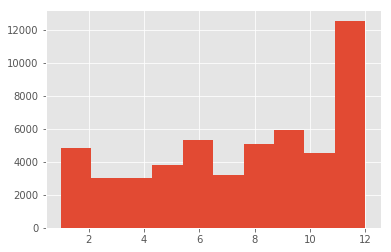

In [20]:
plt.hist(orders['month'])

In [21]:
categories = orders.groupby('Category')
categories.mean()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,month,year,2,3,4,5,6,7,8,9,10,11,12
Category,,,,,,,,,,,,,,,,,,,,
Furniture,24433.693408,55659.508314,416.881646,3.538742,0.167975,28.913045,44.684216,7.583266,2013.774949,0.043002,0.058215,0.057708,0.072312,0.101116,0.062677,0.088540,0.119371,0.094726,0.125355,0.127181
Office Supplies,26078.124165,54916.523171,121.048786,3.459491,0.137460,16.574350,13.113313,7.492122,2013.780338,0.042155,0.058902,0.059414,0.075170,0.104126,0.061939,0.101793,0.116878,0.086164,0.121992,0.119818
Technology,25488.911449,55551.572279,467.859063,3.468691,0.135342,65.455005,50.014484,7.524406,2013.769747,0.045952,0.058180,0.059560,0.071196,0.103244,0.063012,0.099300,0.110837,0.091312,0.124051,0.123656


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002146A1FFDA0>,
      dtype=object)

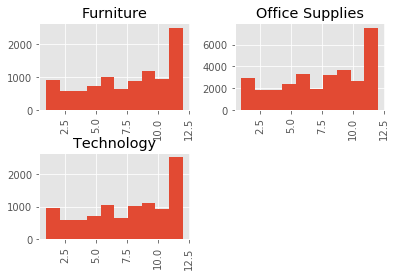

In [22]:
(orders['month']).hist(by=orders.Category)

In [23]:
from sklearn.linear_model import LinearRegression


In [24]:
season = LinearRegression()

Problem 4

In [65]:
returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [25]:
returns.columns = ['Returned', 'Order.ID', 'Region']

In [26]:
ordersreturns = pd.merge(orders, returns, on=['Order.ID','Region'], how='outer')

In [27]:
ordersreturns.groupby(['Returned', 'year']).agg('Profit').sum()

Returned  year  
Yes       2012.0    17396.86
          2013.0     9077.77
          2014.0    17180.12
          2015.0    17114.50
Name: Profit, dtype: float64

How many customers returned more than once?


In [28]:
np.sum(ordersreturns.groupby(['Returned','Customer.Name']).agg('Returned').count()>1)

445

How many customers returned more than 5 times?


In [29]:
np.sum(ordersreturns.groupby(['Returned','Customer.Name']).agg('Returned').count()>5)

123

Returns by region

In [34]:
ordbyregion = ordersreturns.groupby(['Region']).agg('Order.ID').count()

In [35]:
retbyregion = ordersreturns.groupby(['Region']).agg('Returned').count()

In [36]:
(retbyregion/ordbyregion).sort_values(ascending = False)

Region
Western Canada       1.000000
Eastern Canada       1.000000
Western US           0.055261
Eastern Asia         0.055181
Southern Europe      0.053005
Southern Africa      0.052301
Southern US          0.051235
Eastern US           0.047051
Southeastern Asia    0.044743
South America        0.044511
Western Asia         0.044262
Oceania              0.044164
Central America      0.044160
Southern Asia        0.041808
Central Asia         0.041475
Western Africa       0.041096
Caribbean            0.040828
North Africa         0.039906
Western Europe       0.039606
Northern Europe      0.034483
Central US           0.030564
Eastern Europe       0.027469
Central Africa       0.026439
Eastern Africa       0.024725
Canada               0.000000
dtype: float64

In [37]:
ordbycat = ordersreturns.groupby(['Sub.Category']).agg('Order.ID').count()

In [38]:
retbycat = ordersreturns.groupby(['Sub.Category']).agg('Returned').count()

In [39]:
(retbycat/ordbycat).sort_values(ascending = False)

Sub.Category
Labels         0.051903
Tables         0.047619
Accessories    0.044553
Art            0.044408
Copiers        0.044085
Phones         0.043193
Paper          0.042955
Chairs         0.042807
Furnishings    0.042803
Binders        0.042792
Bookcases      0.042721
Supplies       0.042376
Machines       0.041723
Envelopes      0.041475
Storage        0.041196
Fasteners      0.039216
Appliances     0.033869
dtype: float64

Part II

In [41]:
ordersreturns['Ship.Date'] = pd.to_datetime(ordersreturns['Ship.Date'])

In [43]:
ordersreturns['Process.Time'] = ordersreturns['Ship.Date']-ordersreturns['Order.Date']

In [83]:
X = orders[[,2,3,4,5,6,7,8,9,10,11,12]].copy()

X.head()

ValueError: ('Unknown string format:', 'Order.Date')

In [81]:
season.fit(X,orders.Sales)


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [46]:
orders.dtypes


Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date                 object
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
dtype: object

In [11]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
